# Imports

In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

# Constants

In [21]:
TOKEN_SPAM_PROB_FILE = 'SpamData/SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/SpamData/03_Testing/prob-ham.txt'
TOKEN_ALLPROB_FILE = 'SpamData/SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURES_MATRIX = 'SpamData/SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/SpamData/03_Testing/test-target.txt'


PROB_SPAM = 0.310989284824321
VOCAB_SIZE = 2500

In [7]:
# Features 
x_test = np.loadtxt(TEST_FEATURES_MATRIX, delimiter=' ')

#Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

# Probs 
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_token_all = np.loadtxt(TOKEN_ALLPROB_FILE, delimiter=' ')

## Bayes 

$$
P(SPAM|X) = \frac{P(X|SPAM) \cdot P(SPAM)}{P(X)}
$$

## TRANSFORMING INTO LOG 

$$
\log(P(SPAM|X)) = \log(P(X|SPAM)) + \log(P(SPAM)) - \log(P(X))
$$


## joint prob using log 

In [36]:
joint_log_spam = x_test.dot(np.log(prob_token_spam) + np.log(PROB_SPAM) - np.log(prob_token_all))
joint_log_ham = x_test.dot(np.log(prob_token_ham) + np.log(1 - PROB_SPAM) - np.log(prob_token_all))



## checking what is more probable 

###
$$
P(\text{spam} | x) > P(\text{ham} | x)
$$
<br>
<center>  OR  </center>
<br>
$$
P(\text{spam} | x) < P(\text{ham} | x)
$$

### simplify ###

In [43]:
joint_log_spam = x_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM) 
joint_log_ham = x_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM) 

In [44]:
prediction = joint_log_spam > joint_log_ham

## evaluation

In [48]:
correct_docs = (y_test == prediction).sum()


1685

# Visualising

In [88]:
sns.set_style('whitegrid')

summary_df = pd.DataFrame({"P(X | SPAM)": joint_log_spam,"P(X | HAM)": joint_log_ham,
                          'Actual_category': y_test})

C:\Users\IsarShmueli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


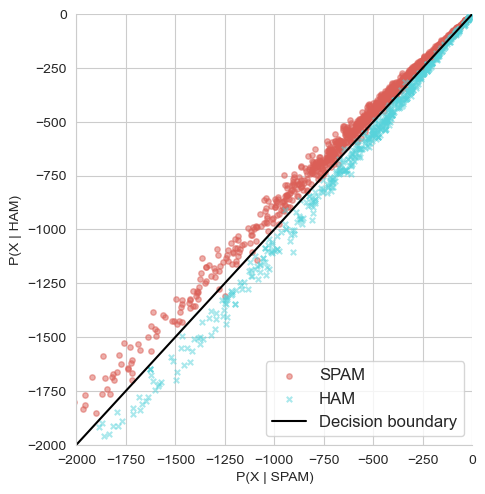

In [114]:
sns.lmplot(x = "P(X | SPAM)", y= "P(X | HAM)", data=summary_df,height=5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 15}, hue= 'Actual_category', markers=['o', 'x'], palette='hls')

plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.plot(boundary_line, boundary_line,color='black')

plt.legend(('SPAM','HAM','Decision boundary'), loc='lower right', fontsize=12)

In [119]:
np.unique(prediction, return_counts=True)
true_pos = (y_test == 1) & (prediction == 1)
false_pos = (y_test == 0) & (prediction == 1)
false_neg = (y_test == 1) & (prediction == 0)
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.2%}'.format(precision_score))
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

Recall score is 96.60%
Precision score is 96.77%
F Score is 0.97
